In [133]:
import os
import rasterio as rio
import geopandas as gpd
import matplotlib.pyplot as plt
import rioxarray as rxr
import numpy as np
import glob

In [3]:
homedir = '/users/marianne/documents/pyrodiversity'
os.chdir(homedir)

In [118]:
yose = gpd.read_file("data/spatial/yosemite.shp")
hucs = gpd.read_file("data/spatial/yose_sheds.shp")
yose_fires = gpd.read_file("data/spatial/yose_mtbs.shp") 
frogcreek = gpd.read_file("data/frogcreek/frogcreek.shp")
huc12 = gpd.read_file("data/frogcreek/yosehuc12.shp")
## there are two frog fires, one of which is prescribed and the other is wild
## change the names so the names are unique
yose_fires.loc[55,'Fire_Name']='FROG_P'
yose_fires.loc[57,'Fire_Name']='FROG_W'
yose_fires.loc[33,'Fire_Name']='UN_1'
yose_fires.loc[44,'Fire_Name']='UN_2'
yose_fires.loc[58,'Fire_Name']='UN_3'

beehive_loc = [37.995000, -119.780000]


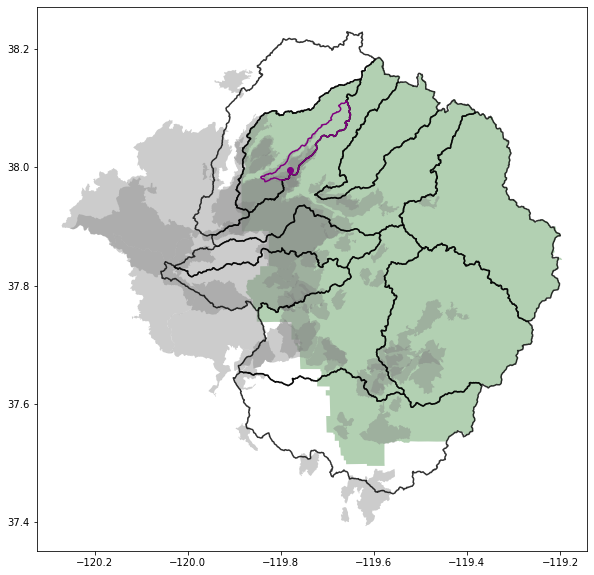

In [130]:
fig,ax = plt.subplots(figsize=(10,10))
yose.plot(ax=ax,color='darkgreen',alpha=0.3)
hucs.boundary.plot(ax=ax,color='black',alpha=0.8)
yose_fires.plot(ax=ax,color='grey',alpha=0.4)
frogcreek.boundary.plot(ax=ax,color='purple')
ax.plot(beehive_loc[1],beehive_loc[0],'o',color='purple')

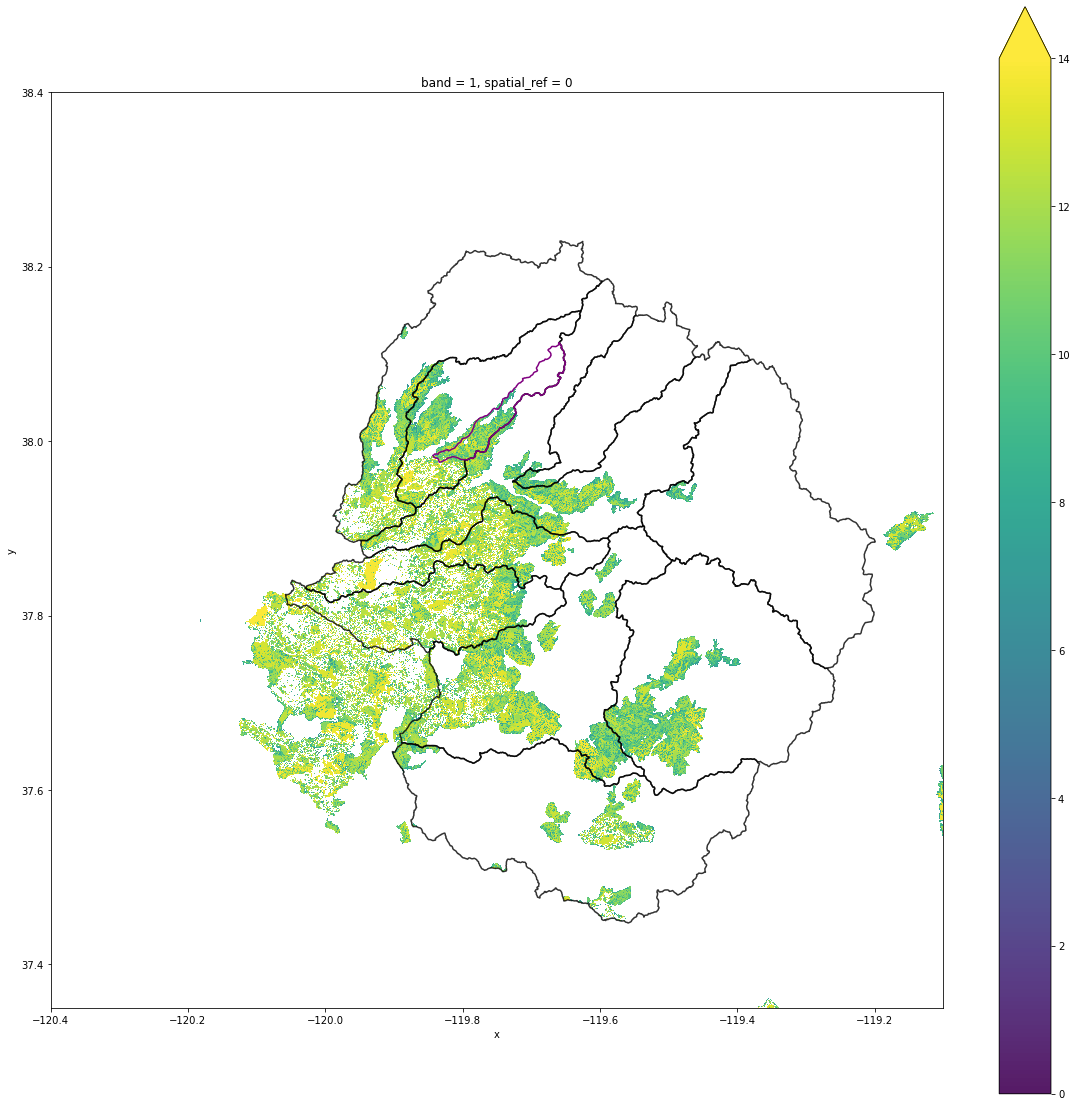

In [6]:
fig,ax=plt.subplots(figsize=(20,20))
files = os.listdir('data/spatial/yose_pat/')
for i in range(len(files)-2):
    tmp = rxr.open_rasterio('data/spatial/yose_pat/'+files[i])
    tmp.values[np.where(tmp.values == tmp._FillValue)] = np.nan
    tmp.values[np.where(tmp.values > 16)] = np.nan
    tmp.plot(vmin=0,vmax=16,cmap = 'viridis',ax=ax,alpha = 0.9,add_colorbar=False)
tmp = rxr.open_rasterio('data/spatial/yose_pat/'+files[i+1])
tmp.values[np.where(tmp.values == tmp._FillValue)] = np.nan
tmp.values[np.where(tmp.values > 16)] = np.nan
tmp.plot(vmin=0,vmax=14,cmap = 'viridis',ax=ax,alpha = 0.9,add_colorbar=True)
hucs.boundary.plot(ax=ax,color='black',alpha=0.8)
ax.set_ybound([37.35,38.4])
ax.set_xbound([-119.1,-120.4])
frogcreek.boundary.plot(ax=ax,color='purple')
ax.plot(beehive_loc[1],beehive_loc[0],'o',color='purple')
plt.show()


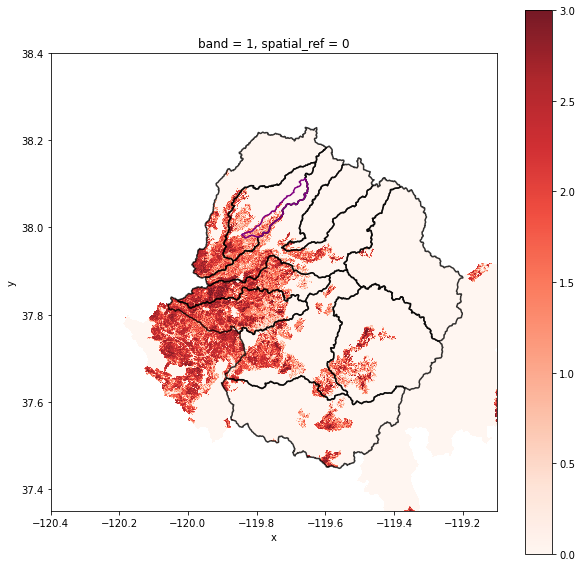

In [7]:
fig,ax=plt.subplots(figsize=(10,10))
maxval =3
files = os.listdir('data/spatial/yose_sev/')
for i in range(len(files)-2):
    tmp = rxr.open_rasterio('data/spatial/yose_sev/'+files[i])
    tmp.values[np.where(tmp.values == tmp._FillValue)] = np.nan
    tmp.values[np.where(tmp.values > maxval)] = np.nan
    tmp.plot(vmin=0,vmax=maxval,cmap = 'Reds',ax=ax,alpha = 0.9,add_colorbar=False)
tmp = rxr.open_rasterio('data/spatial/yose_sev/'+files[i+1])
tmp.values[np.where(tmp.values == tmp._FillValue)] = np.nan
tmp.values[np.where(tmp.values > maxval)] = np.nan
tmp.plot(vmin=0,vmax=maxval,cmap = 'Reds',ax=ax,alpha = 0.9,add_colorbar=True)
hucs.boundary.plot(ax=ax,color='black',alpha=0.8)
frogcreek.boundary.plot(ax=ax,color='purple')
ax.plot(beehive_loc[1],beehive_loc[0],'o',color='purple')
ax.set_ybound([37.35,38.4])
ax.set_xbound([-119.1,-120.4])
plt.show()


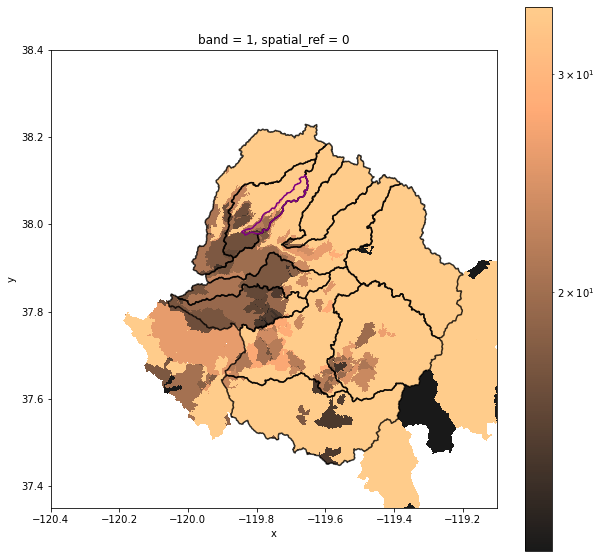

In [8]:
fig,ax=plt.subplots(figsize=(10,10))
import matplotlib
maxval =40
files = os.listdir('data/spatial/yose_fri/')
for i in range(len(files)-2):
    tmp = rxr.open_rasterio('data/spatial/yose_fri/'+files[i])
    tmp.values[np.where(tmp.values == tmp._FillValue)] = np.nan
    tmp.values[np.where(tmp.values > maxval)] = np.nan
    tmp.plot(cmap = 'copper',ax=ax,alpha = 0.9,add_colorbar=False,norm=matplotlib.colors.LogNorm())
tmp = rxr.open_rasterio('data/spatial/yose_fri/'+files[i+1])
tmp.values[np.where(tmp.values == tmp._FillValue)] = np.nan
tmp.values[np.where(tmp.values > maxval)] = np.nan
tmp.plot(cmap = 'copper',ax=ax,alpha = 0.9,add_colorbar=True,norm=matplotlib.colors.LogNorm())
hucs.boundary.plot(ax=ax,color='black',alpha=0.8)
frogcreek.boundary.plot(ax=ax,color='purple')
ax.set_ybound([37.35,38.4])
ax.set_xbound([-119.1,-120.4])
ax.plot(beehive_loc[1],beehive_loc[0],'o',color='purple')
plt.show()


In [10]:
pydi = gpd.read_file("data/yose_pyrodiv.csv")
pydi3=hucs
pydi3['FDis'] = pydi['FDis']

C:\Users\Marianne\AppData\Local\Temp/ipykernel_21036/5312325.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  x = hucs[hucs.index==i].centroid.x[i]
C:\Users\Marianne\AppData\Local\Temp/ipykernel_21036/5312325.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  y = hucs[hucs.index==i].centroid.y[i]


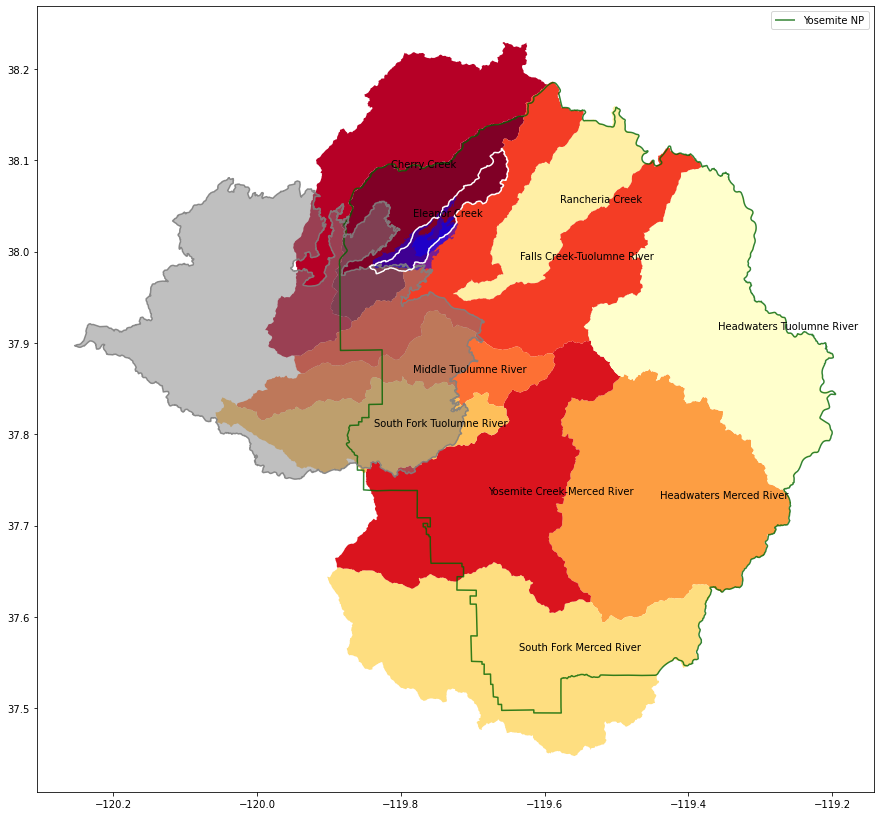

In [11]:
from matplotlib import cm
fig,ax=plt.subplots(figsize=(15,15))
cmap='YlOrRd'
norm = None
yose.boundary.plot(ax=ax,color='darkgreen',alpha=0.8,label = 'Yosemite NP')
pydi3.plot(column='FDis',cmap=cmap,ax=ax,alpha=1,label = 'pyrodiversity',legend=True)
# fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
for i in range(len(hucs.index)):
    x = hucs[hucs.index==i].centroid.x[i]
    y = hucs[hucs.index==i].centroid.y[i]
    name = hucs[hucs.index==i].Name[i]
    ax.text(x,y,name)
yose_fires[yose_fires.Fire_Name=='RIM'].plot(ax=ax,color='gray',alpha=0.5,label = 'Rim Fire')
yose_fires[yose_fires.Fire_Name=='RIM'].boundary.plot(ax=ax,color='gray',alpha=0.9)
yose_fires[yose_fires.Fire_Name=='FROG'].plot(ax=ax,color='blue',alpha=0.5,label = 'Frog Fire')
frogcreek.boundary.plot(ax=ax,color='white')
ax.plot(beehive_loc[1],beehive_loc[0],'o',color='white')
ax.legend()
plt.show()

,Fire_ID,Fire_Name,Year,StartMonth,StartDay,Fire_Type,Acres,jday,geometry
55,CA3800211977920060721,FROG,2006.0,7.0,21.0,Prescribed Fire,6673.0,202.0,"POLYGON ((-119.83899 37.98584, -119.83914 37.9..."
57,CA3801911975119870628,FROG,1987.0,6.0,28.0,Wildfire,3451.0,179.0,"POLYGON ((-119.73245 38.05478, -119.73221 38.0..."


C:\Users\Marianne\AppData\Local\Temp/ipykernel_21036/1496934167.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  x = fire.centroid.x[i].values[0]
C:\Users\Marianne\AppData\Local\Temp/ipykernel_21036/1496934167.py:20: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  y = fire.centroid.y[i].values[0]
C:\Users\Marianne\AppData\Local\Temp/ipykernel_21036/1496934167.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  x = fire.centroid.x[i].values[0]
C:\Users\Marianne\AppData\Local\Temp/ipykernel_21036/1496934167.py:20: UserWarning: Geometry is in a geographic CRS. Results fr

<AxesSubplot:>

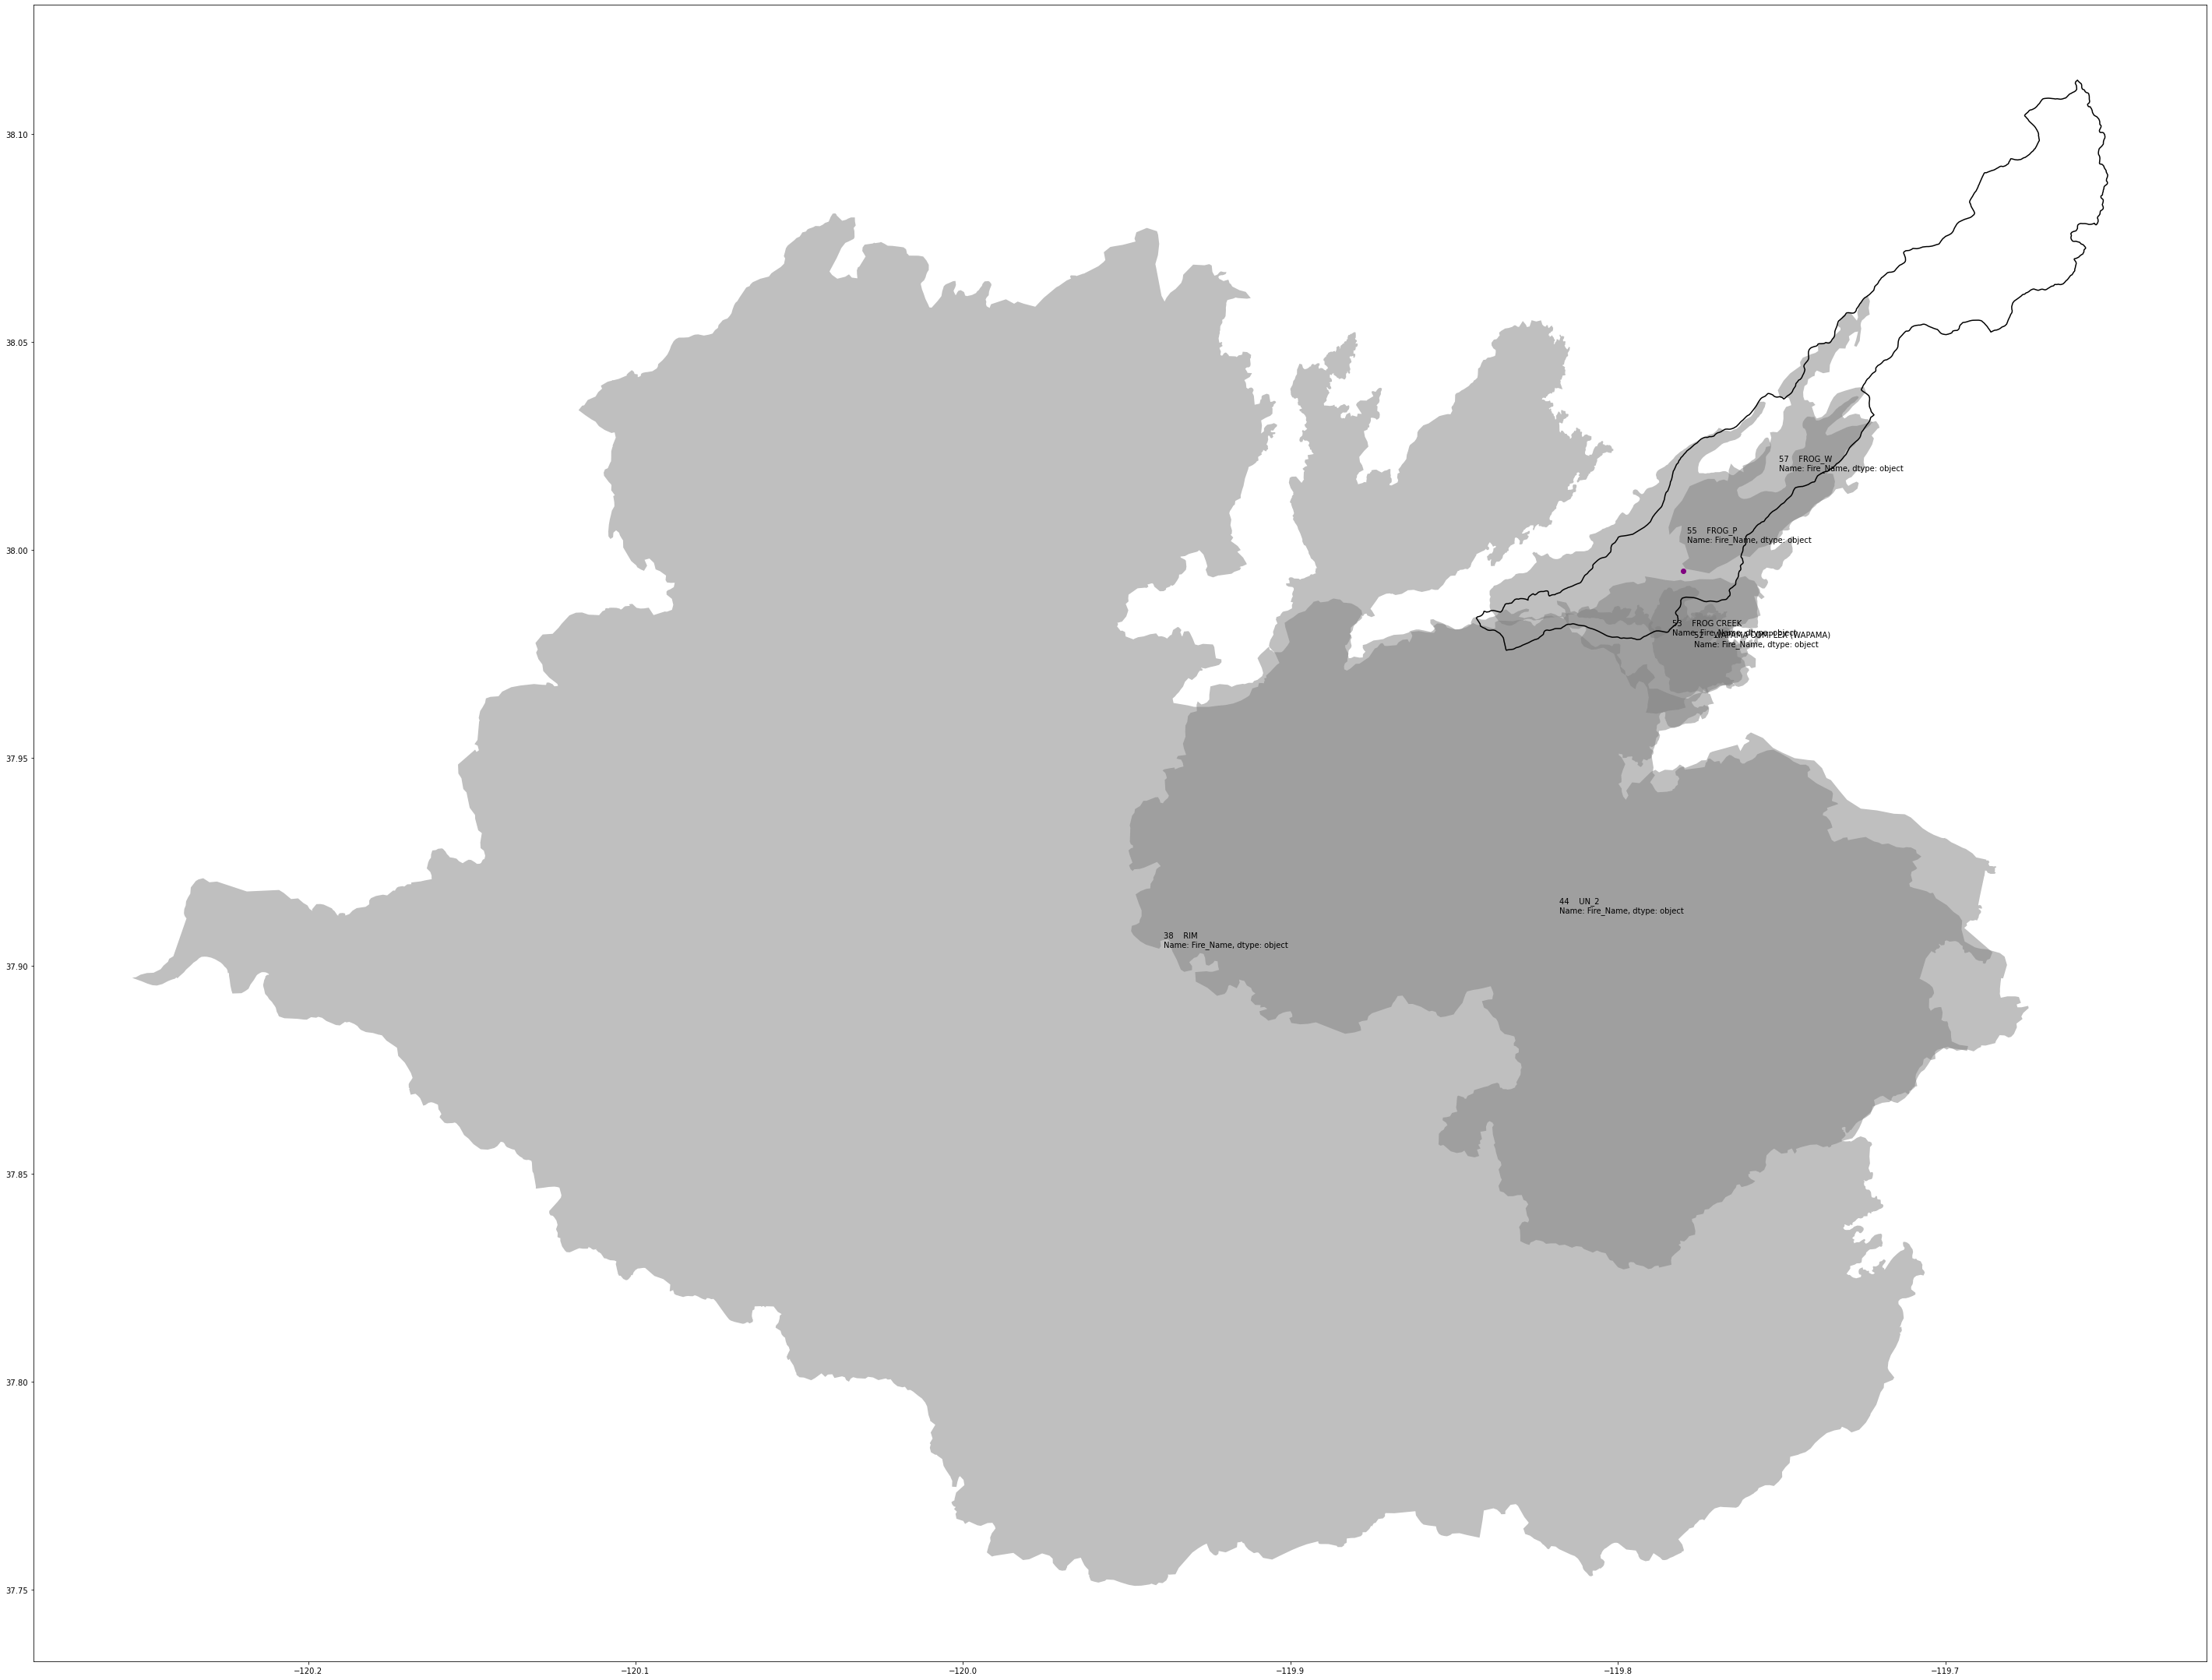

In [132]:
# yose_fires[yose_fires.Fire_Name=='FROG']# .plot(color='gray',alpha=0.5)
fig,ax=plt.subplots(figsize=(50,50))
frognames = ['FROG_P','FROG_W','RIM','FROG CREEK','WAPAMA COMPLEX (WAPAMA)','UN_2']
'''for i in range(64):
    fire = yose_fires[yose_fires.index==i]
    fire.plot(ax=ax,color='gray',alpha=0.5,label = str(i))
    name = fire.Fire_Name[i]
    x = fire.centroid.x[i]
    y = fire.centroid.y[i]
    ax.text(x,y,name)'''
# fig,ax=plt.subplots()
for n in frognames:
    fire = yose_fires[yose_fires.Fire_Name == n]
    fire = fire.to_crs(frogcreek.crs)
    # print(fire)
    i = fire.index
    fire.plot(ax=ax,color='gray',alpha=0.5,label = str(i))
    name = str(fire.Fire_Name[i])
    x = fire.centroid.x[i].values[0]
    y = fire.centroid.y[i].values[0]
    # print(x[0])
    ax.text(x,y,name)

ax.plot(beehive_loc[1],beehive_loc[0],'o',color='purple')

allmtbs = gpd.read_file('c:/users/marianne/documents/pe_snow_fires/data/firebounds_sn.gdf')
frog_t = frogcreek.to_crs(allmtbs.crs)
# yose_fires.plot(ax=ax,alpha=0.3)
frog_t.boundary.plot(ax=ax,color='black')
# frogfires = allmtbs.sjoin(yose)
#frogfires

#yose.boundary.plot(ax=ax,color='darkgreen',alpha=0.8,label = 'Yosemite NP')
#frogcreek.boundary.plot(ax=ax,color='purple')
#frogfires.plot(ax=ax)


<AxesSubplot:title={'center':'CE 2016-04-01'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>

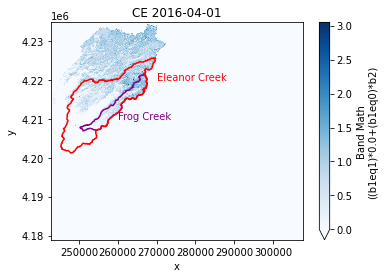

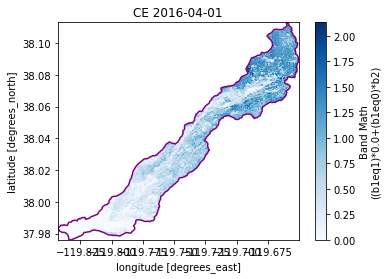

In [246]:
import datetime
import glob
eleanor = hucs[hucs.Name == 'Eleanor Creek']
##load in and plot all relevant ASO data for frog creek:
list = glob.glob(r'data/aso/*.tif')
tmp = list[0]
basin = tmp.split('SWE_USCA')[1].split('_')[0]
date = tmp.split('SWE_USCA')[1].split('_')[1].split('.tif')[0]
image_date = datetime.date(year=int(date[0:4]),month=int(date[4:6]),day=int(date[6:8]))
fig,ax=plt.subplots()
data = rxr.open_rasterio(tmp)
data.rio.set_crs('epsg:32611')
data.plot(cmap='Blues',vmin=0,ax=ax)
frog_utm = frogcreek.to_crs(data.rio.crs)
frog_utm.boundary.plot(ax=ax,color='purple')
ax.set_title(basin + ' ' + str(image_date))
ax.text(260000,4.21e6,'Frog Creek',color='purple')
eleanor.to_crs(data.rio.crs).boundary.plot(ax=ax,color='red')
ax.text(270000,4.22e6,'Eleanor Creek',color='red')

fig,ax=plt.subplots()
data_t = data.rio.reproject(frog_t.crs,dst_FillValue = np.nan)
data_t['_FillValue'] = np.nan
data_t.attrs['_FillValue'] = np.nan
data_t.values[data_t.values<-1] = np.nan
frog_data = data_t.rio.clip(frog_t.geometry)
frog_data.plot(vmin = 0,cmap='Blues',ax=ax)
ax.set_title(basin + ' ' + str(image_date))
frog_t.boundary.plot(ax=ax,color='purple')


In [255]:
eleanor = hucs[hucs.Name == 'Eleanor Creek']
filename = 'aso_data'
image_dates=[]
basins = []
frog_datas = []
eleanor_datas = []
frog_means = []
frog_devs = []
eleanor_means = []
eleanor_devs = []
import pickle 
for file in list:
    ## get name of basin and date of acquisition
    basin = file.split('SWE_USCA')[1].split('_')[0]
    date = file.split('SWE_USCA')[1].split('_')[1].split('.tif')[0]
    image_date = datetime.date(year=int(date[0:4]),month=int(date[4:6]),day=int(date[6:8]))
    ## read in data
    data = rxr.open_rasterio(file)
    data.rio.set_crs('epsg:32611')  # utm north 11
    data_t = data.rio.reproject(frog_t.crs)  # reproject to lat/lon standard
    data_t['_FillValue'] = np.nan
    data_t.attrs['_FillValue'] = np.nan
    data_t.values[data_t.values<-1] = np.nan
    frog_data = data_t.rio.clip(frog_t.geometry)  # clip to only frog creek area
    eleanor_data = data_t.rio.clip(eleanor.geometry)
    frog_mean = np.nanmean(frog_data)
    frog_dev = np.nanstd(frog_data)
    eleanor_mean = np.nanmean(eleanor_data)
    eleanor_dev = np.nanstd(eleanor_data)
    ## add all to lists
    image_dates.append(image_date)
    basins.append(basin)
    frog_datas.append(frog_data)
    eleanor_datas.append(eleanor_data)
    frog_means.append(frog_mean)
    frog_devs.append(frog_dev)
    eleanor_means.append(eleanor_mean)
    eleanor_devs.append(eleanor_dev)



to_save = {
    'dt' : image_dates,
    'basin' : basins,
    'frog_data': frog_datas,
    'eleanor_data' : eleanor_datas,
    'frog_mean_swe': frog_means,
    'frog_dev_swe' : frog_devs,
    'eleanor_mean_swe': eleanor_means,
    'eleanor_dev_swe' : eleanor_devs
}

with open(filename + '.pkl', 'wb') as file:
    pickle.dump(to_save, file)
    

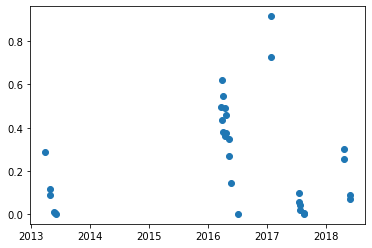

In [257]:
fig,ax=plt.subplots()
ax.plot(to_save['dt'],to_save['frog_mean_swe'],'o')

In [216]:
frog_data.loc[frog_data == frog_data._FillValue] = np.nan

IndexError: 3-dimensional boolean indexing is not supported. 

In [199]:
data_t.coords = ['lat','lon','band','spatial_ref']

AttributeError: can't set attribute

In [202]:
type(frog_t.geometry)

geopandas.geoseries.GeoSeries